In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('metrorio_data.csv')
df['linha']=df['linha'].apply(lambda x: str(x))

In [3]:
df_linha1=df.loc[df['linha']=='1'].reset_index(drop=True).groupby(['data','linha'],as_index=False,sort=False).sum()
df_linha2=df.loc[df['linha']=='2'].reset_index(drop=True).groupby(['data','linha'],as_index=False,sort=False).sum()
df_linha4=df.loc[df['linha']=='4'].reset_index(drop=True).groupby(['data','linha'],as_index=False,sort=False).sum()

df_linha_total=df.groupby('data',as_index=False,sort=False).sum()

In [4]:
def grafico_linha_ano(df_linha,ano):
    
    df_copia=df_linha.copy()
    df_copia['ano']=df_copia['data'].apply(lambda x: x[3:])
    df_copia=df_copia.loc[df_copia['ano']==ano].reset_index(drop=True)
    df_copia=df_copia[['data','n_passageiros','linha']]
    
    x=df_copia['data']
    y=df_copia['n_passageiros']
    
    if int(ano)>=30:
        ano='19'+ano
    else:
        ano='20'+ano
    
    try:
        plt.figure(figsize=(10,5))
        plt.xlabel('Mês')
        plt.ylabel('Número de Passageiros')
        plt.title('Número de Passageiros da Linha {} do MetroRio por Mês no ano de {}'.format(df_copia['linha'][0],ano))
        plt.plot(x,y,'.')
    except:
        print('Não existia essa linha de metrô no ano de {}'.format(ano))

In [120]:
def grafico_total_ano(ano):
    df_copia=df_linha_total.copy()
    df_copia['ano']=df_copia['data'].apply(lambda x: x[3:])
    df_copia=df_copia.loc[df_copia['ano']==ano].reset_index(drop=True)
    df_copia=df_copia[['data','n_passageiros']]
    
    x=df_copia['data']
    y=df_copia['n_passageiros']
    
    if int(ano)>=30:
        ano='19'+ano
    else:
        ano='20'+ano
    
    plt.figure(figsize=(10,5))
    plt.xlabel('Mês')
    plt.ylabel('Número de Passageiros')
    plt.title('Número de Passageiros Totais do MetroRio por Mês no ano de {}'.format(ano))
    plt.plot(x,y,'.')

In [161]:
def grafico_linha_desde_2016():
    
    
    plt.figure(figsize=(10,5))
    plt.xlabel('Ano')
    plt.ylabel('Número de Passageiros')
    plt.title('Número de Passageiros de cada linha do MetroRio por Mês desde 2016')
    
    for df_linha in [df_linha1,df_linha2,df_linha4]:
        df_copia=df_linha.copy()
        df_copia['ano']=df_copia['data'].apply(lambda x: x[3:])
        df_copia['ano']=df_copia['ano'].apply(lambda x: int(x))
        df_copia=df_copia.loc[df_copia['ano']>=16].reset_index(drop=True)
        df_copia=df_copia.loc[df_copia['ano']<=90].reset_index(drop=True)
        df_copia=df_copia[['data','n_passageiros','linha','ano']]

        x=df_copia['data']
        y=df_copia['n_passageiros']
        linha='Linha '+df_copia['linha'][0]
        
        plt.plot(x,y,'.',label=linha)
    
    ylabels=[str(int(label))+'Mi' for label in np.arange(0,2,.2)*10]
    xlabels=['20'+str(ano) for ano in set(df_copia['ano'])]
    plt.yticks(np.arange(0,1.9,.2)*1e07,labels=ylabels)
    plt.xticks(np.arange(0,90,12),labels=xlabels)
    plt.legend()

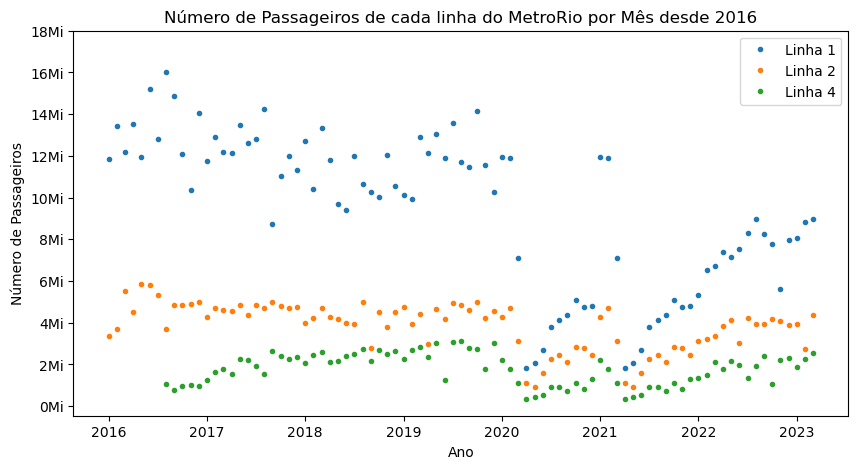

In [162]:
grafico_linha_desde_2016()